In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

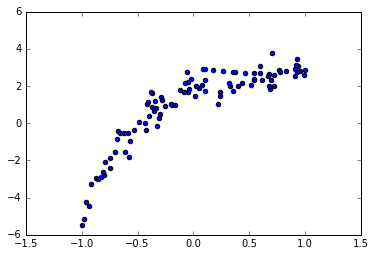

In [2]:
sigma = 0.5
def generate(N):
    def generate_feature_vector(N):
        X = np.random.uniform(-1, 1, (N, 2))
        X[:, 1] = 1
        return X

    def f(X):
        noise = np.random.normal(0, 1, X.shape) * sigma
        return 2 * X * X * X - 3 * X * X + 2 * X + 2 + noise
    X = generate_feature_vector(N)
    y = f(X[:, 0])
    return X, y

# generate training samples
N = 100
X, y = generate(N)
plt.scatter(X[:, 0], y)

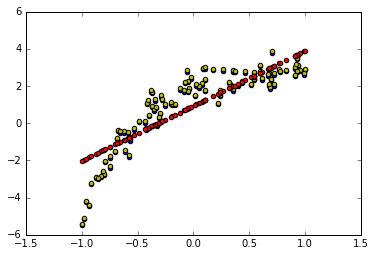

In [6]:
# kernel
def poly(a, b):
    return float(np.dot(a, b) + 1) ** 3

def RBF(a, b):
    return float(np.exp(-np.linalg.norm(a-b) + 1))


def predict(X, k, l):
    # train
    K = np.array([[k(x_i, x_j) for x_j in X] for x_i in X])
    a = np.dot(np.linalg.inv(K + l), y)
    w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X) + l), X.T), y)

    # predict
    def predict_kernel(X_new):
        k_new = np.array([[k(x_i, x_j) for x_j in X_new] for x_i in X])
        return np.dot(k_new.T, a)

    def predict_linear(X_new):
        return np.dot(w, X_new.T)

    return predict_kernel, predict_linear

predict_kernel, predict_linear = predict(X, RBF, 1)

# prediction of training samples
y_train_kernel = predict_kernel(X)
y_train_linear = predict_linear(X)

# plot
plt.scatter(X[:, 0], y, c='b')
plt.scatter(X[:, 0], y_train_kernel, c='y')
plt.scatter(X[:, 0], y_train_linear, c='r')

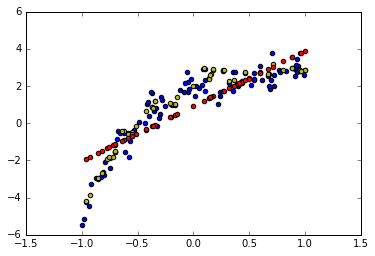

In [4]:
# test samples
M = 50
X_new, _ = generate(M)

# prediction of test samples
y_new_kernel = predict_kernel(X_new)
y_new_linear = predict_linear(X_new)

# plot
plt.scatter(X[:, 0], y, c='b')
plt.scatter(X_new[:, 0], y_new_kernel, c='y')
plt.scatter(X_new[:, 0], y_new_linear, c='r')